# Step 7: SHAP method
---
Goal of the notebook: Local interpretability: Implement the SHAP method to interpret your own model.
Compare the results provided in Steps 6 and 7

Inputs of the notebook:

Output of the notebook:


Takeaways:

Questions, thoughts and remarks:

To do's:
- do a few force plots for SHAP

## Dependencies and path
Adjust the argument in `sys.path.append` to align with your specific requirements.

In [1]:
import pandas as pd 
import numpy as np
import os
import sys

%load_ext autoreload
%autoreload 2

os.chdir('C:/Users/dorab/OneDrive - Ecole Polytechnique/Documents/DSB - HECxX/Year 2/Algorithmic Fairness and Interpretability/afi_final_project')

## 1. Load the data

In [2]:
df = pd.read_excel("data/dataproject2024.xlsx")

In [3]:
X = df.drop(["Default (y)", "Pred_default (y_hat)", "ID", "PD", "Group"], axis=1)
y = df["Default (y)"]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## 2. Best Model (found in step 2 notebook)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
    random_state=42,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=2,
    n_estimators=200,
    subsample=0.8,
)

model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42, subsample=0.8)

In [6]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.24496717, 0.35678308, 0.21518544, ..., 0.21939194, 0.0838712 ,
       0.08884575])

## 3. SHAP

Although SHAP is model-agnostic to calculate it it is optimized according to the model used. We used a tree-based model.

c:\Users\dorab\OneDrive - Ecole Polytechnique\Documents\DSB - HECxX\Year 2\Algorithmic Fairness and Interpretability\afi_final_project\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


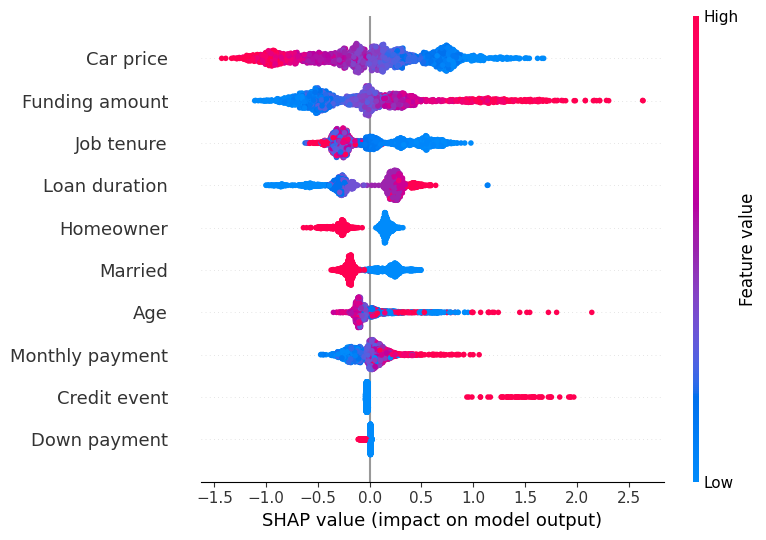

In [7]:
import shap

# Initialize SHAP Tree Explainer
explainer = shap.TreeExplainer(model)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test)

In [ ]:
pred = model.predict(Xd, output_margin=True)

explainer = shap.TreeExplainer(model)
explanation = explainer(Xd)

shap_values = explanation.values
# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()